In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import fashion_mnist

(images, labels), (X_test, y_test) = fashion_mnist.load_data()

2024-03-20 19:21:24.839687: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
images = images.astype("float32") / 255
images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
labels = np.eye(10)[labels]

X_test = X_test.astype("float32") / 255
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
y_test = np.eye(10)[y_test]

In [17]:
weights = np.random.uniform(-0.5, 0.5, (40, 784))
weights2 = np.random.uniform(-0.5, 0.5, (10, 40))
biases = np.zeros((40, 1))
biases2 = np.zeros((10, 1))

epochs = 5
learn_rate = 0.05
predictions = 0
te = 0

In [18]:
batch_size = 128
batches = images.shape[0] // batch_size

if batches * batch_size < images.shape[0]:
    batches += 1

In [19]:
for epoch in range(epochs):
    for batch in range(batches):
        batch_images = images[batch*batch_size:(batch+1)*batch_size]
        batch_labels = labels[batch*batch_size:(batch+1)*batch_size]

        for l, img in zip(batch_labels, batch_images):
            img = img.reshape(784, -1)
            l = l.reshape(10, -1)
            
            #first neuron Layer
            layer_dense = np.dot(weights, img) + biases
            #Sigmoid activation function
            h = 1 / (1 + np.exp(-layer_dense))

            #second neuron Layer
            layer_hidden = np.dot(weights2, h) + biases2
            #Sigmoid activation function
            output = 1 / (1 + np.exp(-layer_hidden))

            # Cost / Error calculation #pls revist
            te += np.square(np.subtract(output, l)).mean()

            #accuracy calculation  
            predictions += int(np.argmax(output) == np.argmax(l))

            #Backpropagation
            delta_o = output - l
            weights2 += -learn_rate * np.dot(delta_o, h.T)
            biases2 += -learn_rate * delta_o

            delta_h =  (h * (1 - h)) * np.dot(weights2.T, delta_o)
            weights += -learn_rate * np.dot(delta_h, img.T)
            biases += -learn_rate * delta_h

            #accuracy calculation
            accu = (predictions / images.shape[0]) * 100

    te /= batches

    print(
        f"Epoch: {epoch}, "
        f"Acc: {accu:.3f}%, "
        f"Error: {te}"
        )
        
    predictions = 0
    te = 0

Epoch: 0, Acc: 79.317%, Error: 3.801049892789479
Epoch: 1, Acc: 82.535%, Error: 3.2594866235141216
Epoch: 2, Acc: 83.957%, Error: 3.0532487968146125
Epoch: 3, Acc: 84.823%, Error: 2.8887219485874396
Epoch: 4, Acc: 85.192%, Error: 2.8010043773950604


In [18]:
# Initialize Adam optimizer parameters
m_weights2 = np.zeros_like(weights2)
v_weights2 = np.zeros_like(weights2)
m_biases2 = np.zeros_like(biases2)
v_biases2 = np.zeros_like(biases2)

m_weights = np.zeros_like(weights)
v_weights = np.zeros_like(weights)
m_biases = np.zeros_like(biases)
v_biases = np.zeros_like(biases)

# Set hyperparameters for Adam optimizer
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Backpropagation
delta_o = output - l
m_weights2 = beta1 * m_weights2 + (1 - beta1) * delta_o @ h.T
v_weights2 = beta2 * v_weights2 + (1 - beta2) * (delta_o @ h.T) ** 2
m_biases2 = beta1 * m_biases2 + (1 - beta1) * delta_o
v_biases2 = beta2 * v_biases2 + (1 - beta2) * delta_o ** 2

weights2 += -learn_rate * m_weights2 / (np.sqrt(v_weights2) + epsilon)
biases2 += -learn_rate * m_biases2 / (np.sqrt(v_biases2) + epsilon)

delta_h = weights2.T @ delta_o * (h * (1 - h))
m_weights = beta1 * m_weights + (1 - beta1) * delta_h @ img.T
v_weights = beta2 * v_weights + (1 - beta2) * (delta_h @ img.T) ** 2
m_biases = beta1 * m_biases + (1 - beta1) * delta_h
v_biases = beta2 * v_biases + (1 - beta2) * delta_h ** 2

weights += -learn_rate * m_weights / (np.sqrt(v_weights) + epsilon)
biases += -learn_rate * m_biases / (np.sqrt(v_biases) + epsilon)

# Predictions

In [22]:
predictions = 0

for X, y_true in zip(X_test, y_test):
    X = X.reshape(784, -1)

    # Forward propagation input -> hidden
    h_pre = biases + weights @ X
    h = 1 / (1 + np.exp(-h_pre))

    # Forward propagation hidden -> output
    o_pre = biases2 + weights2 @ h
    o = 1 / (1 + np.exp(-o_pre))

    predictions += int(np.argmax(o) == np.argmax(y_true))

accu = (predictions / len(X_test)) * 100

print("Accuracy:", accu)


Accuracy: 82.72


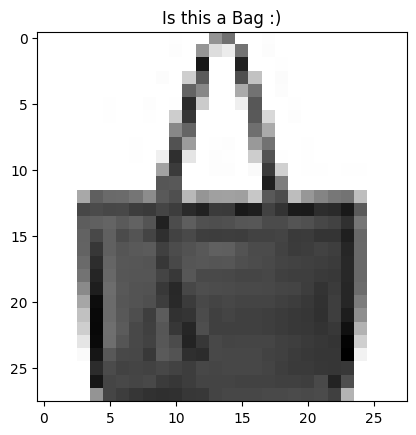

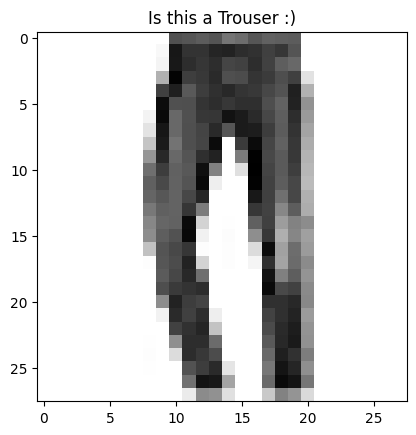

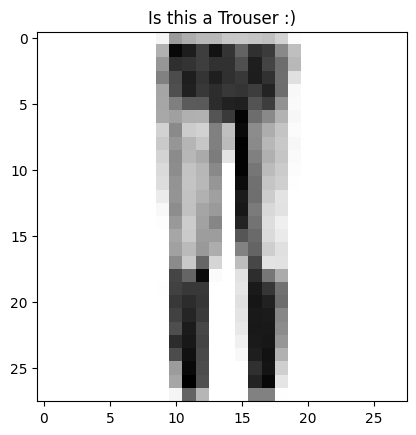

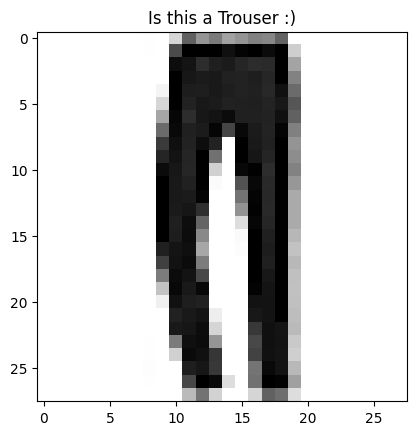

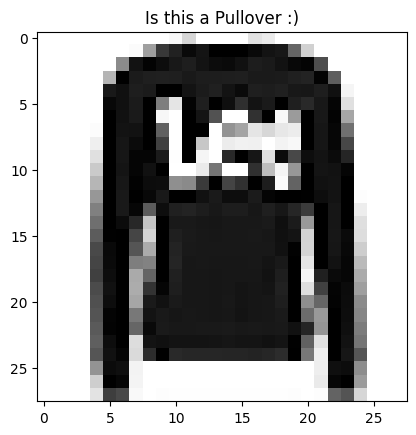

ValueError: invalid literal for int() with base 10: ''

In [28]:
mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Show results
while True:
    index = int(input("Enter a number (0 - 999): "))
    img = X_test[index]
    plt.imshow(img.reshape(28, 28), cmap="Greys")

    img.shape += (1,)
    # Forward propagation input -> hidden
    h_pre = biases + weights @ img.reshape(784, 1)
    h = 1 / (1 + np.exp(-h_pre))
    # Forward propagation hidden -> output
    o_pre = biases2 + weights2 @ h
    o = 1 / (1 + np.exp(-o_pre))

    #call the clothing item
    category_name = mapping[o.argmax()]
    category_name

    plt.title(f"Is this a {category_name} :)")
    plt.show()